# Predict Income 💵💰

## 📝 Project Description

## 📋 Features Dictionary

| Column           | Dtype   | Description                      |
|------------------|---------|----------------------------------|
| age              | int64   | Individual's age in years.       |
| workclass        | object  | Type of employment.              |
| fnlwgt           | int64   | Final weight for the record.     |
| education        | object  | Highest level of education.      |
| educational-num  | int64   | Numeric representation of education. |
| marital-status   | object  | Marital status of the individual.|
| occupation       | object  | Type of job or role.             |
| relationship     | object  | Relationship within the family.  |
| race             | object  | Racial category of the individual. |
| gender           | object  | Gender of the individual.        |
| capital-gain     | int64   | Income from investment gains.    |
| capital-loss     | int64   | Losses from investments.         |
| hours-per-week   | int64   | Weekly working hours.            |
| native-country   | object  | Country of origin.               |
| income           | object  | Income level category.           |


# Load & Inspect Data 🔍

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from helper_functions import explore_numeric, explore_categorical, evaluate_classification, plot_importance, plot_categorical_vs_target, plot_numeric_vs_target

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance

from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings('ignore')

heatmap_cmap= "Blues"
SEED= 42

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)


In [ ]:
path= '../project/data/adult.csv'

df= pd.read_csv(path)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Data Cleaning 🧼

## 🗐 Duplicate Values

In [3]:
df.duplicated().sum()

52

In [4]:
duplicated_rows= df.duplicated(keep= False)
df[duplicated_rows].sort_values(by= 'fnlwgt')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
41905,39,Private,30916,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
45127,39,Private,30916,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
38156,49,Private,31267,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
24201,49,Private,31267,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38648,44,Private,367749,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,45,Mexico,<=50K
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
3900,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
33127,35,Private,379959,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K


`Since all the duplicated rows represent the same person, we only need to keep one. `

In [5]:
df= df.drop_duplicates(keep= 'first')
df.duplicated().sum()

0

## ❌ Inconsistencies Categorical Values

In [6]:
cat_cols= df.select_dtypes(include= 'object')

for col in cat_cols:
    print(df[col].value_counts())
    print('_'*20)

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
____________________
education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: count, dtype: int64
____________________
marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: count, dtype: int64
____________________
occupation
Prof-speci

`There are no inconsistent values.`

## 🗂️ Coulmns Data Types

`There are no categorical columns that need to be transferred to numeric.`

## ⚠️ Missing Values

In [7]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

`There are no missing values; there is no need to use the simple imputer in the preprocessing step.`

## ❗Unusual Data Points

In [8]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
help(explore_numeric)

Help on function explore_numeric in module helper_functions:

explore_numeric(df, x, figsize=(8, 5))



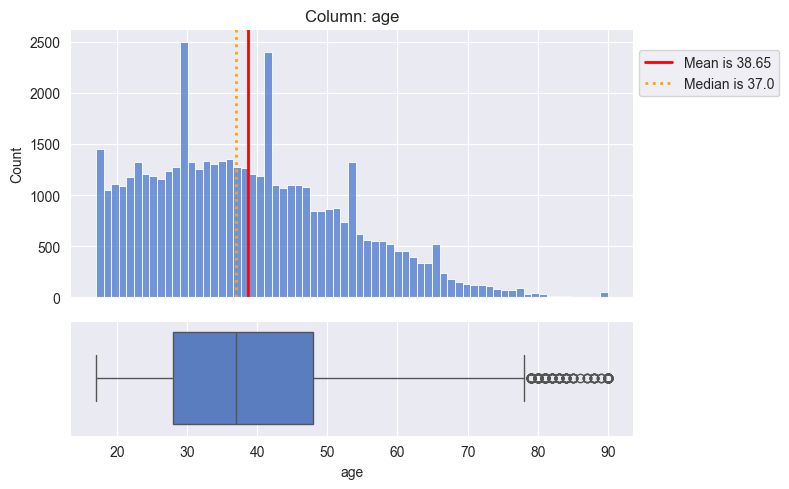

- NaN's Found: 0 (0.0%)
- Most common value: '36' occurs 1348 times (2.76%)
- Not constant or quasi-constant.


In [10]:
explore_numeric(df, x= 'age');

- Based on the box plot, it looks like we have multiple `outliers` from the `range of 80 to 90`, but are they really!
- I'll `not remove` these data points as the age is `reasonable`, and they just represented the minority in this dataset.

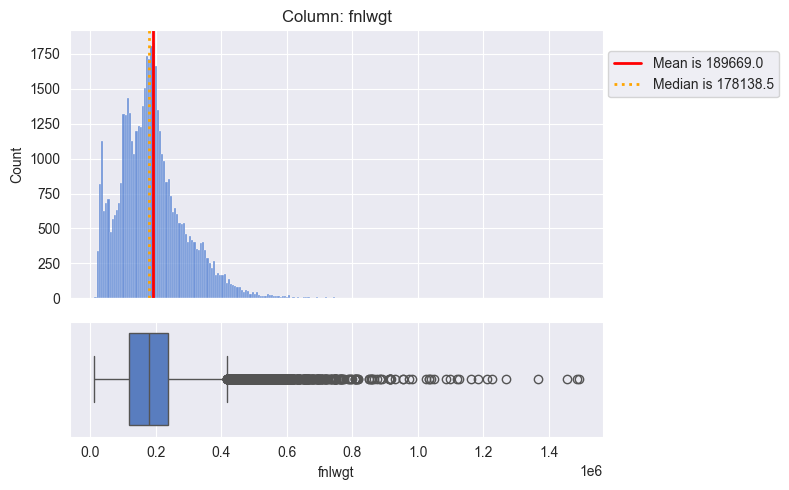

- NaN's Found: 0 (0.0%)
- Most common value: '203488' occurs 21 times (0.04%)
- Not constant or quasi-constant.


In [11]:
explore_numeric(df, x='fnlwgt');

- Since this feature represents a weight, and it looks like most of the weights are between `0 - 0.4` and there are some `outliers` that are `above 0.4`, that causes the histogram to be `right-skewed`.
- There are `no strong arguments` to delete these outliers, so I'll `keep` these data points since they mostly represent a minority.

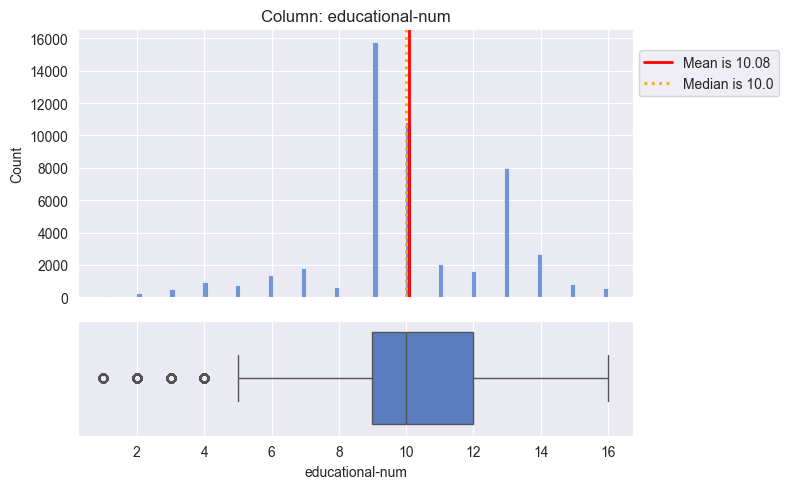

- NaN's Found: 0 (0.0%)
- Most common value: '9' occurs 15770 times (32.32%)
- Not constant or quasi-constant.


In [12]:
explore_numeric(df, x= 'educational-num');

- This feature represents the `education level` of the person, and we can see that there is some `minority` that they only graduated from the first grades, and they didn't finish school.
- No reason to remove these data points.

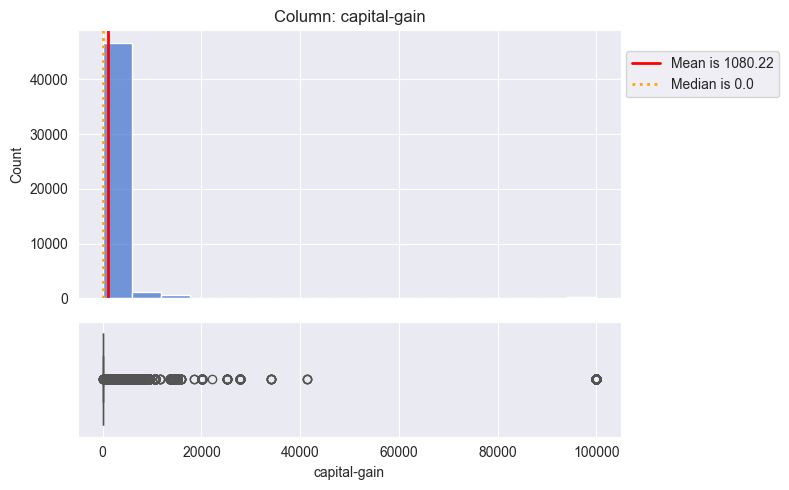

- NaN's Found: 0 (0.0%)
- Most common value: '0' occurs 44755 times (91.73%)
- Not constant or quasi-constant.


In [13]:
explore_numeric(df, x= 'capital-gain');

- It looks like it is not common to make income from investment; that is why it `appears` like we have `multiple outliers`.
- But there are `no strong arguments to remove` these outliers, as it looks like they are smart people and invested their money right.

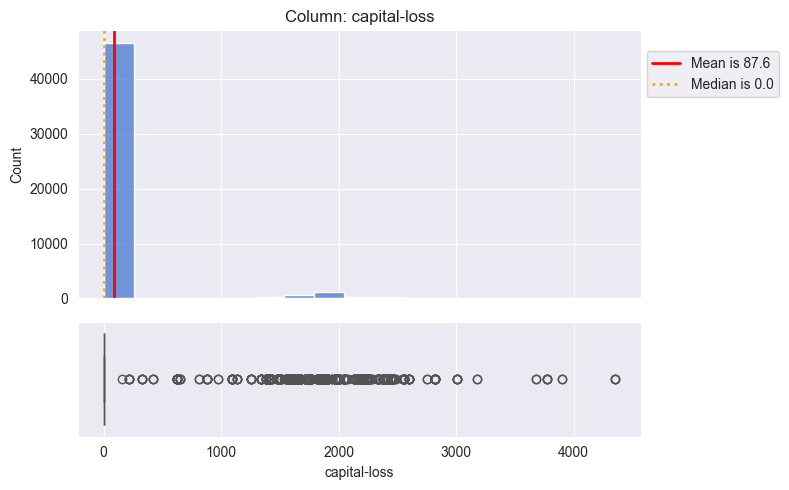

- NaN's Found: 0 (0.0%)
- Most common value: '0' occurs 46508 times (95.32%)
- Not constant or quasi-constant.


In [14]:
explore_numeric(df, x= 'capital-loss');

- Well, it is the same case, it is not common to `invest`; that's why there are `outliers`, so I'll leave them and will not remove them.

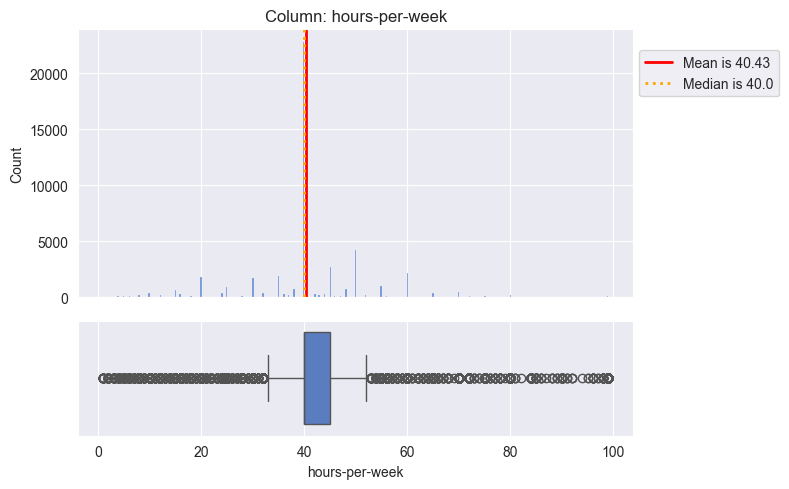

- NaN's Found: 0 (0.0%)
- Most common value: '40' occurs 22773 times (46.68%)
- Not constant or quasi-constant.


In [15]:
explore_numeric(df, x= 'hours-per-week');

- It looks like the median is around 40 hours.
- The people who work less than 40 or 30 hours maybe they are working part-time.
- The people that are working a lot of hours weekly may be they are from third world countries.
- No reason to remove any datapoint

In [16]:
df.describe(include= ['object'])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48790,48790,48790,48790,48790,48790,48790,48790,48790
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33860,15770,22366,6165,19703,41714,32614,43792,37109


## 🆔 Set Index

In [17]:
df['fnlwgt'].nunique()

28523

In [18]:
df.shape

(48790, 15)

`Well, there is no other unique identifier, so I'll leave the index as it is.`

## ⚖️ Check Balance

In [19]:
df['income'].value_counts(normalize= True)

income
<=50K    0.760586
>50K     0.239414
Name: proportion, dtype: float64

`The data is unbalanced; we need to make it balanced in the preprocessing step, but for now I'll do some visualization first.`

# Feature Inspection 👀

## 📊 Univariate Exploratory Visualizations

`Since we explored all the numeric features in the unusual data points part, let us now explore the categorical features.`

In [20]:
help(explore_categorical)

Help on function explore_categorical in module helper_functions:

explore_categorical(df, x, hue, fillna=True, placeholder='MISSING', figsize=(6, 4), order=None)



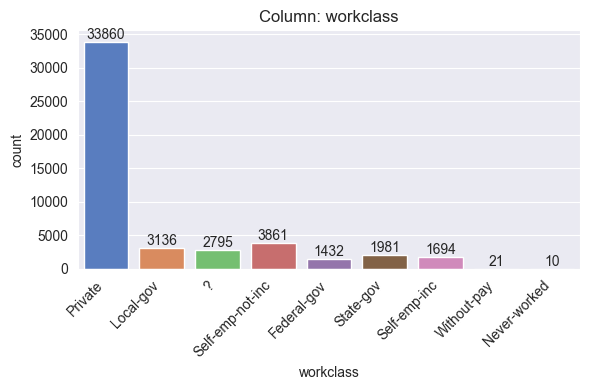

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: 'Private' occurs 33860 times (69.4%)
- Not constant or quasi-constant.


In [21]:
explore_categorical(df, x= 'workclass', hue= 'workclass');

`It is very clear that most of the people in this data set get their income from the private sector.`

In [22]:
df.describe(include= ['object'])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48790,48790,48790,48790,48790,48790,48790,48790,48790
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33860,15770,22366,6165,19703,41714,32614,43792,37109


In [23]:
df['education'].value_counts()

education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: count, dtype: int64

In [24]:
order_education= ['Preschool','1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Assoc-voc', 'Assoc-acdm', 'Some-college', 'Bachelors', 'Prof-school', 'Masters', 'Doctorate']

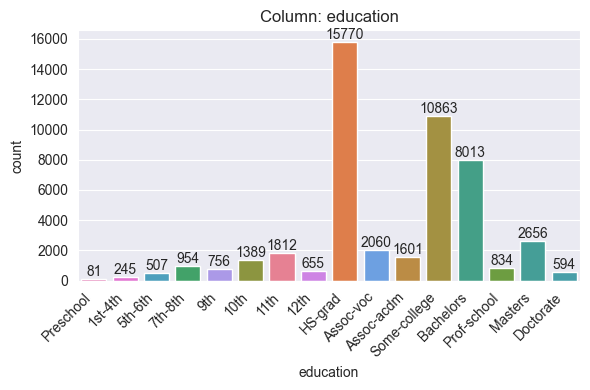

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'HS-grad' occurs 15770 times (32.32%)
- Not constant or quasi-constant.


In [25]:
explore_categorical(df, x= 'education', hue= 'education', order= order_education);

`We can see most of the people in the data are high school graduates, then college dropouts, meaning they took some courses in college but didn't finish, and we also have high bachelor graduates.`

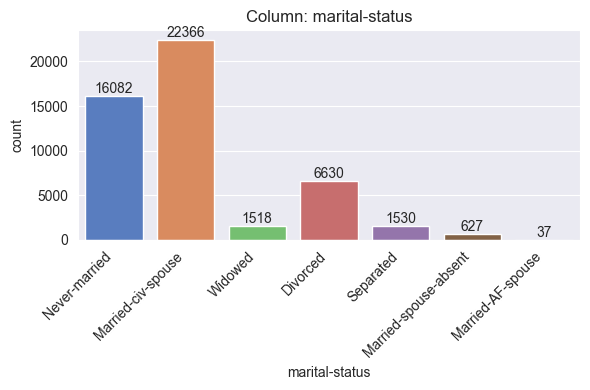

- NaN's Found: 0 (0.0%)
- Unique Values: 7
- Most common value: 'Married-civ-spouse' occurs 22366 times (45.84%)
- Not constant or quasi-constant.


In [26]:
explore_categorical(df, x= 'marital-status', hue= 'marital-status');

`We can see the highest category is married to a civilian spouse, then never married.`

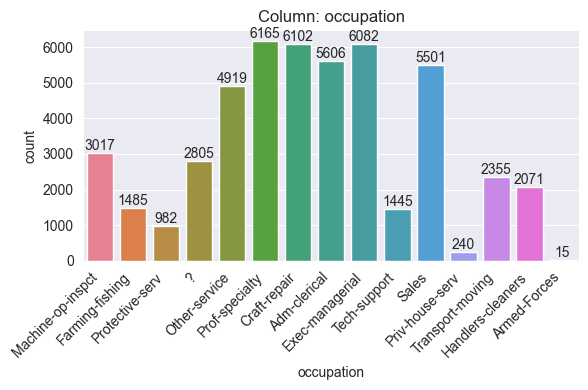

- NaN's Found: 0 (0.0%)
- Unique Values: 15
- Most common value: 'Prof-specialty' occurs 6165 times (12.64%)
- Not constant or quasi-constant.


In [27]:
explore_categorical(df, x= 'occupation', hue= 'occupation');

`We can see that the counts are diverse and close to each other, with no dominant value.`

- **Prof-specialty:** Professional specialty jobs (e.g., doctors, engineers).
- **Craft-repair:** Skilled trades like electricians or mechanics.
- **Exec-managerial:** Executive or managerial roles.
- **Adm-clerical:** Administrative or clerical work (e.g., secretaries).
- **Sales:** Sales-related occupations (e.g., retail, real estate).
- **Other-service:** Miscellaneous service roles (e.g., cleaners, personal care).
- **Machine-op-inspct:** Machine operators or inspectors.
- **?:** Missing or unknown occupation.
- **Transport-moving:** Transportation and moving jobs (e.g., drivers).
- **Handlers-cleaners:** Manual labor like warehouse workers or janitors.
- **Farming-fishing:** Agricultural or fishing-related jobs.
- **Tech-support:** Technical support roles (e.g., IT support).
- **Protective-serv:** Protective services (e.g., police, security).
- **Priv-house-serv:** Private household services (e.g., nannies, housekeepers).
- **Armed-Forces:** Members of the military.

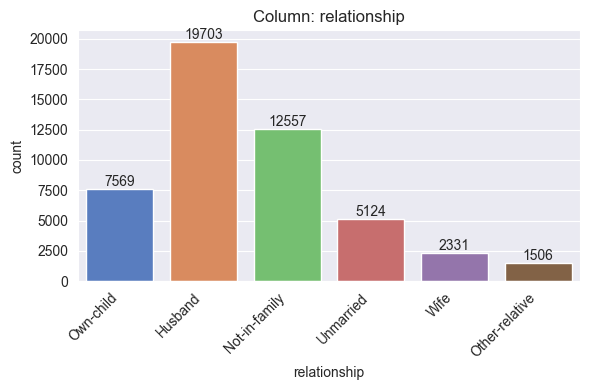

- NaN's Found: 0 (0.0%)
- Unique Values: 6
- Most common value: 'Husband' occurs 19703 times (40.38%)
- Not constant or quasi-constant.


In [28]:
explore_categorical(df, x= 'relationship', hue= 'relationship');

`We can see that Husband value is the dominant one, with 40.38% occurrence.`

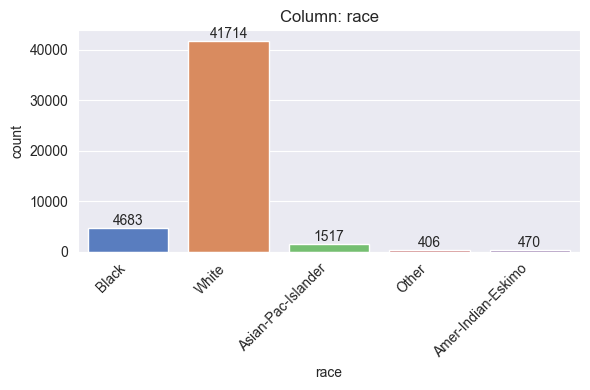

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'White' occurs 41714 times (85.5%)
- Not constant or quasi-constant.


In [29]:
explore_categorical(df, x= 'race', hue= 'race');

`We can see that White value is the dominant one, with 85.5% occurrence.`

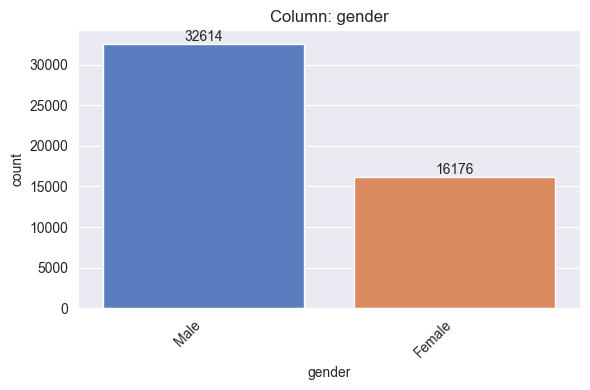

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Male' occurs 32614 times (66.85%)
- Not constant or quasi-constant.


In [30]:
explore_categorical(df, x= 'gender', hue= 'gender');

`We can see that the majority of this data are males.`

In [31]:
df['native-country'].nunique()

42

In [32]:
df['native-country'].value_counts(normalize= True).round(4) * 100

native-country
United-States                 89.76
Mexico                         1.93
?                              1.75
Philippines                    0.60
Germany                        0.42
Puerto-Rico                    0.38
Canada                         0.37
El-Salvador                    0.32
India                          0.31
Cuba                           0.28
England                        0.26
China                          0.25
South                          0.24
Jamaica                        0.22
Italy                          0.22
Dominican-Republic             0.21
Japan                          0.19
Poland                         0.18
Guatemala                      0.18
Vietnam                        0.18
Columbia                       0.17
Haiti                          0.15
Portugal                       0.14
Taiwan                         0.13
Iran                           0.12
Greece                         0.10
Nicaragua                      0.10
Peru         

`We have 42 unique values, which will be difficult to visualize on the plot, but based on the value counts, we can see that the United States has the majority with 89.76%`

## 🔥Correlation Heatmap

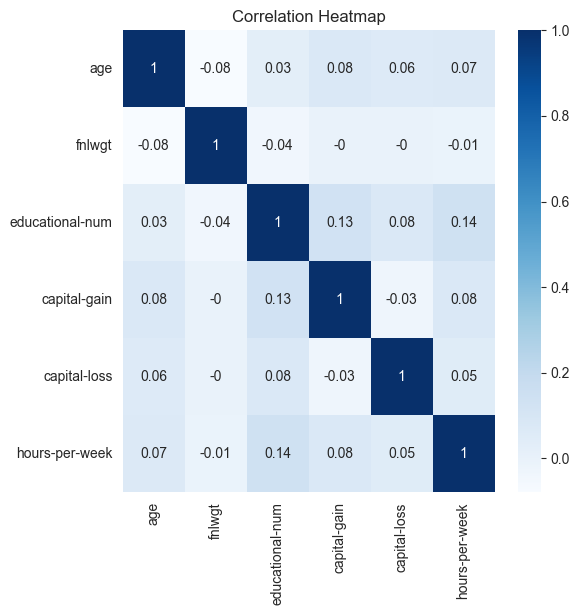

In [33]:
corr= df.corr(numeric_only= True).round(2)

fig, ax= plt.subplots(figsize= (6,6))
ax.set_title('Correlation Heatmap')
ax= sns.heatmap(corr, annot= True, cmap= heatmap_cmap)

- It looks like there is `no high multicollinearity` between the features, and that is good.

# Modeling 🧠⚙️

## ⏮️ Preprocessing

In [34]:
X= df.drop(columns= 'income')
y= df['income']

X.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States


In [35]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= SEED)

In [36]:
numeric_cols= X_train.select_dtypes(include= 'number').columns
ordinal_cols= ['education']
nominal_cols= X_train.select_dtypes(include= 'object').drop(columns= ordinal_cols).columns

In [37]:
numeric_scaler= StandardScaler()
numeric_tuple= ('Numerical', numeric_scaler, numeric_cols)

In [38]:
ordinal_encoder= OrdinalEncoder(categories= [order_education])
ordinal_scaler= StandardScaler()

ordinal_pipe= make_pipeline(ordinal_encoder, ordinal_scaler)
ordinal_tuple= ('Ordinal', ordinal_pipe, ordinal_cols)

In [39]:
nominal_encoder= OneHotEncoder(drop='first', handle_unknown='ignore')

nominal_tuple= ('Noiminal', nominal_encoder, nominal_cols)

In [40]:
preprocessor= ColumnTransformer([numeric_tuple, ordinal_tuple, nominal_tuple], verbose_feature_names_out= False)
preprocessor

ColumnTransformer(transformers=[('Numerical', StandardScaler(),
                                 Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                ('Ordinal',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Preschool',
                                                                              '1st-4th',
                                                                              '5th-6th',
                                                                              '7th-8th',
                                                                              '9th',
                                                                              '10th',
                                                                              '11th',
                                                                              '12th',
                                                                              'HS-grad',
                                                                              'Assoc-voc',
                                                                              'Assoc-acdm',
                                                                              'Some-college',
                                                                              'Bachelors',
                                                                              'Prof-school',
                                                                              'Masters',
                                                                              'Doctorate']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['education']),
                                ('Noiminal',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'gender', 'native-country'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [ ]:
# Step 1: Transform X_train and X_test with the same preprocessor
X_train_pro_transformed= preprocessor.fit_transform(X_train)
X_test_transformed= preprocessor.transform(X_test)

# If the output is sparse, convert to dense
if hasattr(X_train_pro_transformed, "toarray"):
    X_train_pro_transformed= X_train_pro_transformed.toarray()
    X_test_transformed= X_test_transformed.toarray()

# Step 2: Apply SMOTE to X_train and y_train
sm= SMOTE(random_state= SEED)
sm_X_train, sm_y_train= sm.fit_resample(X_train_pro_transformed, y_train)

# Step 3: Convert sm_X_train back to a DataFrame with proper feature names
sm_X_train_df= pd.DataFrame(sm_X_train, columns= preprocessor.get_feature_names_out())
sm_y_train_df= pd.Series(sm_y_train, name= 'income')

## 🌳 Random Forest Classifier

In [54]:
# Step 4: Train the RandomForest model
random_forest= RandomForestClassifier(random_state= SEED)
random_forest_model= random_forest.fit(sm_X_train_df, sm_y_train_df)

# Step 5: Apply preprocessing to X_test and ensure consistency
X_test_df= pd.DataFrame(X_test_transformed, columns= preprocessor.get_feature_names_out())

In [ ]:
help(evaluate_classification)

Help on function evaluate_classification in module helper_functions:

evaluate_classification(model, X_train, y_train, X_test, y_test, figsize=(6, 4), normalize='true', output_dict=False, cmap_train='Blues', cmap_test='Reds', colorbar=False)



----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     27841
        >50K       1.00      1.00      1.00     27841

    accuracy                           1.00     55682
   macro avg       1.00      1.00      1.00     55682
weighted avg       1.00      1.00      1.00     55682



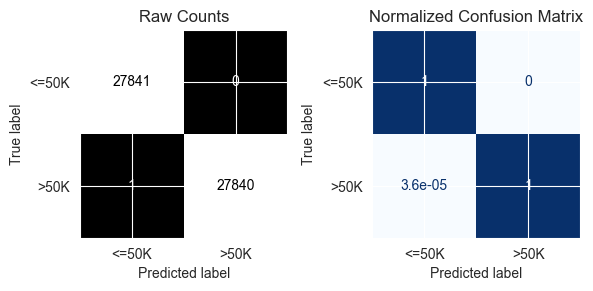


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.90      0.90      0.90      9268
        >50K       0.68      0.69      0.68      2930

    accuracy                           0.85     12198
   macro avg       0.79      0.79      0.79     12198
weighted avg       0.85      0.85      0.85     12198



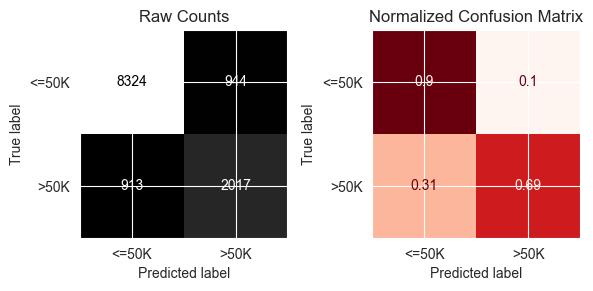

In [55]:
evaluate_classification(random_forest_model, sm_X_train_df, sm_y_train_df, X_test_df, y_test)

- We can see that the model is clearly `overfitted`.
- In this case I'll focus on improving the performance by improving the `F1 score` since we don't have a priority for precision over recall or vice versa.

## 🎼 Cross-Validation & Parameter Tuning Using GridSearchCV

In [66]:
random_forest.get_params()

params = {'randomforestclassifier__max_depth': [None,10,15],
          'randomforestclassifier__n_estimators':[10,100],
          'randomforestclassifier__min_samples_leaf':[3,4],
          'randomforestclassifier__max_features':[None],
          'randomforestclassifier__oob_score':[True,False],
        }

In [67]:
random_forest= RandomForestClassifier(random_state= SEED)
random_forest_pipe = make_pipeline(random_forest)

random_forest_gridsearch= GridSearchCV(random_forest_pipe, params, n_jobs= -1, cv= 2, verbose= 1)

random_forest_gridsearch.fit(sm_X_train_df, sm_y_train_df)
random_forest_gridsearch.best_params_

Fitting 2 folds for each of 24 candidates, totalling 48 fits


{'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': None,
 'randomforestclassifier__min_samples_leaf': 3,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__oob_score': True}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.97      0.97      0.97     27841
        >50K       0.97      0.97      0.97     27841

    accuracy                           0.97     55682
   macro avg       0.97      0.97      0.97     55682
weighted avg       0.97      0.97      0.97     55682



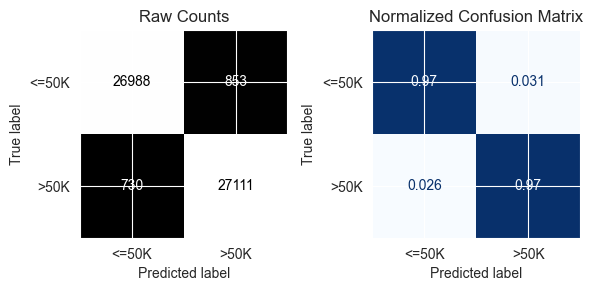


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.91      0.89      0.90      9268
        >50K       0.68      0.71      0.69      2930

    accuracy                           0.85     12198
   macro avg       0.79      0.80      0.80     12198
weighted avg       0.85      0.85      0.85     12198



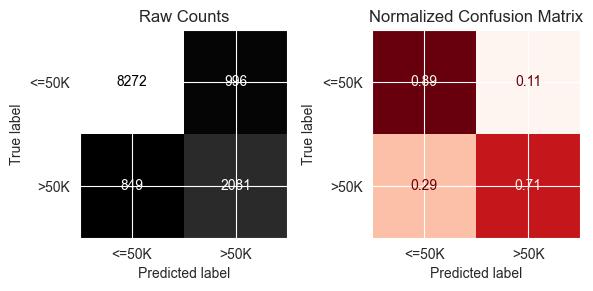

In [ ]:
best_random_forest_model= random_forest_gridsearch.best_estimator_
evaluate_classification(best_random_forest_model, sm_X_train_df, sm_y_train_df, X_test_df, y_test)

- We can see some `improvement` in `overfitting`.
- The macro average for the `F1 score` is `80%`, which is good.

## 🏆 Permutation Importance

In [74]:
r= permutation_importance(best_random_forest_model, X_test_df, y_test, n_repeats= 5, random_state= SEED)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [76]:
permutation_importances = pd.Series(r['importances_mean'],index= X_test_df.columns, name ='permutation importance')
permutation_importances = permutation_importances.sort_values(ascending= False)
permutation_importances

educational-num                      0.103082
education                            0.079669
marital-status_Married-civ-spouse    0.069733
capital-gain                         0.039482
age                                  0.025266
                                       ...   
native-country_Philippines          -0.000230
race_White                          -0.000295
relationship_Unmarried              -0.000328
marital-status_Never-married        -0.000508
occupation_Craft-repair             -0.000590
Name: permutation importance, Length: 86, dtype: float64

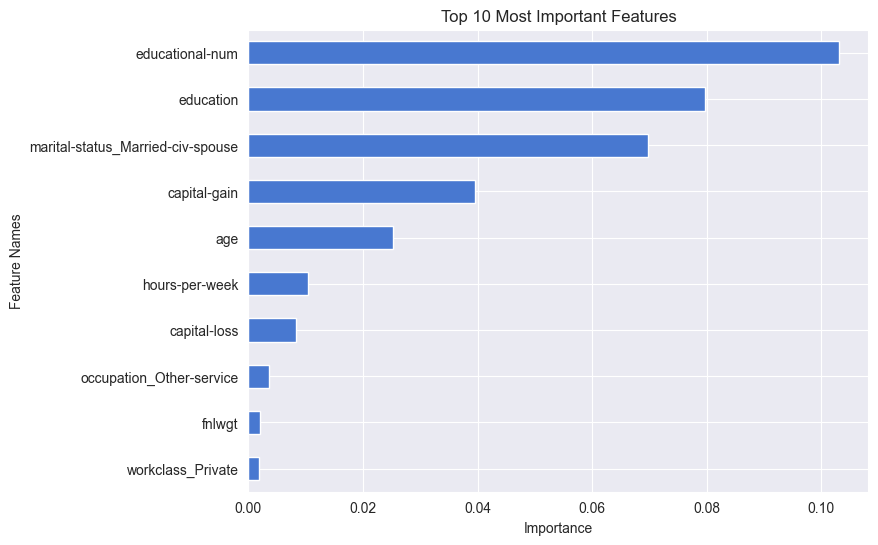

In [78]:
plot_importance(permutation_importances, top_n= 10);

- Based on the figure, we can see that the most important feature is the `education`, which makes a lot of sense, since it is related directly to the income.
- Also we can see the other features make sense as well, such as the `age` and the `marital status`. 

## 📈 Multivariate Exploratory Visualizations

In [81]:
help(plot_numeric_vs_target)

Help on function plot_numeric_vs_target in module helper_functions:

plot_numeric_vs_target(df, x, y, figsize=(6, 4), target_type='reg', estimator='mean', errorbar='ci', sorted=False, ascending=False, **kwargs)



In [82]:
df.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


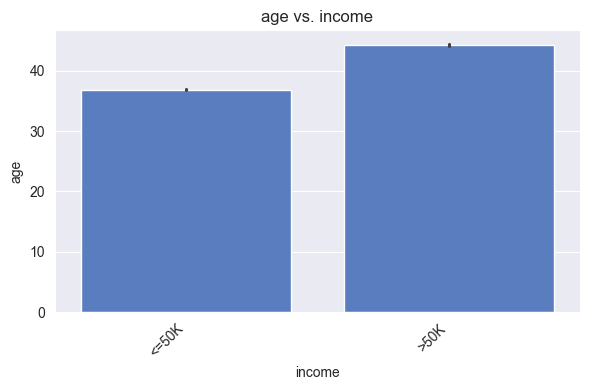

In [85]:
plot_numeric_vs_target(df, x= 'age', y= 'income', target_type= 'class');

`We can see from the plot that people with more experience and an average age above 40 will get an income higher than 50k.`

In [86]:
help(plot_categorical_vs_target)

Help on function plot_categorical_vs_target in module helper_functions:

plot_categorical_vs_target(df, x, y, figsize=(8, 4), fillna=True, placeholder='MISSING', order=None, target_type='reg')



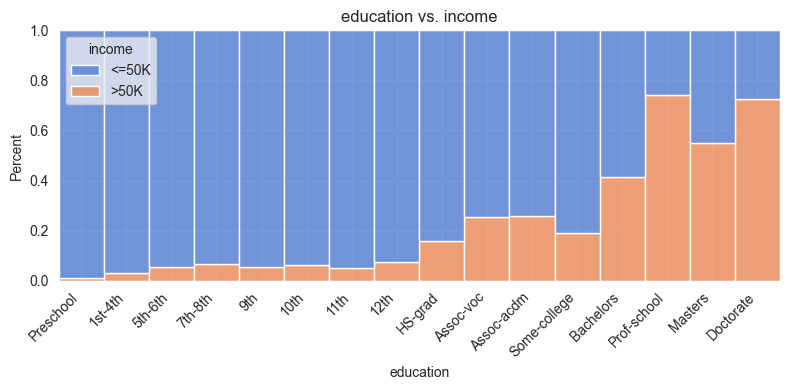

In [90]:
plot_categorical_vs_target(df, x= 'education', y= 'income', target_type= 'class', order= order_education);

`We can see from the plot that people with higher education get higher income than the people who have lower education levels.`